Please enter the name of the car : Maruti Wagon R LXI CNG
Price predicted in lakhs :  5.558899999999998


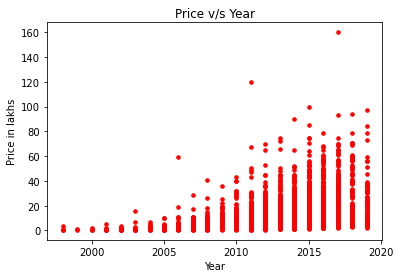

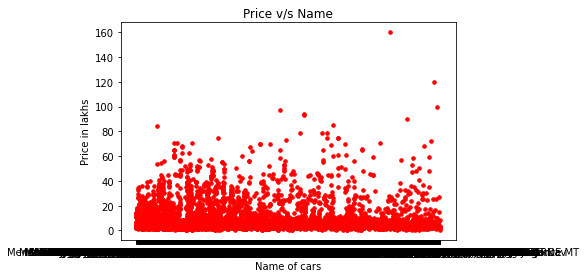

In [7]:
import pandas as pd
import numpy as np
import sklearn

df = pd.read_csv(r"C:\Users\namra\OneDrive\Desktop\Internship\changed_dataset.csv")
req_cols = ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage_in_kmpl', 'Engine_in_CC', 'Power_in_bhp', 'Seats']
y = df.Price_in_lakhs
w = df.Name
z = df.Year

def code():
    from sklearn.preprocessing import LabelEncoder
    enc=LabelEncoder()
    enc.fit(df.Name)
    df.Name=enc.transform(df.Name)
    enc.fit(df.Transmission)
    df.Transmission=enc.transform(df.Transmission)
    enc.fit(df.Owner_Type)
    df.Owner_Type=enc.transform(df.Owner_Type)
    enc.fit(df.Mileage_in_kmpl)
    df.Mileage_in_kmpl=enc.transform(df.Mileage_in_kmpl)
    enc.fit(df.Engine_in_CC)
    df.Engine_in_CC=enc.transform(df.Engine_in_CC)
    enc.fit(df.Power_in_bhp)
    df.Power_in_bhp=enc.transform(df.Power_in_bhp)
    enc.fit(df.Location)
    df.Location=enc.transform(df.Location)
    enc.fit(df.Fuel_Type)
    df.Fuel_Type=enc.transform(df.Fuel_Type)

    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    x = df[req_cols]
    from sklearn.model_selection import train_test_split
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25, random_state=0)

    from sklearn.ensemble import RandomForestRegressor
    model = RandomForestRegressor()
    model.fit(X_train, Y_train)
    #print(model.score(X_test, Y_test)*100)
    y_pred = model.predict(X_test)
    print("Price predicted in lakhs : ", y_pred[-1])

    from matplotlib import pyplot as plt
    plt.scatter(z, y, c='r', s=50, marker=".")
    plt.title("Price v/s Year")
    plt.ylabel("Price in lakhs")
    plt.xlabel("Year")
    plt.show()

    plt.scatter(w, y, c='r', s=50, marker=".")
    plt.title("Price v/s Name")
    plt.ylabel("Price in lakhs")
    plt.xlabel("Name of cars")
    plt.show()

def error():
    print("No match found for the entered car name")

nm = input("Please enter the name of the car : ")
if nm in (list(df.Name)):
    code()
else:
    error()
